<a href="https://colab.research.google.com/github/AndrewPolyak/PyTorch-Self-Learning/blob/main/exercises/PyTorch_Binary_Classification_Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Binary Classification Mini Project

*By Andrew Polyak*

In this notebook, I will create a binary classification neural network using `sklearn.datasets` and PyTorch. The results will be visualized with MatPlotLib. The work will be done from scratch to demonstrate progress of knowledge of the above frameworks.

## Create dataset

We will work with SKLearn's `make_circles()` dataset using its base parameters.

1. First, we will configure the environment's device (either `cuda` or `cpu`).
2. Second, we will load the features and labels of the dataset.
3. Third, we will transform the features and labels into tensors.
4. Fourth, we will visualize one element from the dataset.
5. Fifth, we will split the dataset into training and evaluation splits.

In [227]:
import torch
import torch.nn as nn
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [228]:
# Configure device
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Current device: {device}")

Current device: cuda


In [229]:
# Create dataset
X_arr, y_arr = make_circles()

# Transform X and y from numpy arrays to torch tensors with data type float
X, y = torch.from_numpy(X_arr).type(torch.float), torch.from_numpy(y_arr).type(torch.float)

print(f"Shape of X: {X.shape} | Shape of y: {y.shape}\n")
print(f"First 5 features of X:\n {X[:5]} \n\nFirst 5 labels of y: \n{y[:5]}")

Shape of X: torch.Size([100, 2]) | Shape of y: torch.Size([100])

First 5 features of X:
 tensor([[ 0.7290, -0.6845],
        [-0.6472, -0.4702],
        [ 0.9686,  0.2487],
        [ 0.3406,  0.7239],
        [-0.7749, -0.1990]]) 

First 5 labels of y: 
tensor([0., 1., 0., 1., 1.])


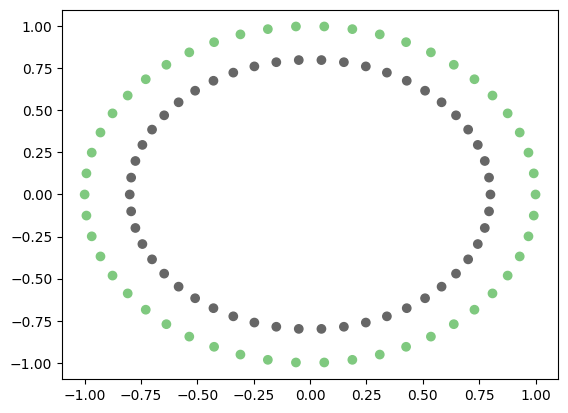

In [230]:
# Visualize one element from the dataset
plt.figure()

# Since the features have 100 elements with 2 dimensions, we need to plot both such dimensions
plt.scatter(x=X[:,0].cpu(), # x-axis gets dimension 0
            y=X[:,1].cpu(), # y-axis gets dimension 1
            c=y, # Apply each of the colours of the below colour map
            cmap=plt.cm.Accent) # Select a colour map

In [231]:
X, y = X.to(device), y.to(device)

In [232]:
# Create the training and evaluation splits
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, # train set = 80%, test set = 20%
                                                    random_state=8) # Seed to make randomness reproducable

print(f"X training feature split: {len(X_train)},\ny training label split: {len(y_train)},\nX testing feature split: {len(X_test)},\ny testing feature split: {len(y_test)}")

X training feature split: 80,
y training label split: 80,
X testing feature split: 20,
y testing feature split: 20


## Create model

We will define a model with 1 input layer, 1 hidden layer, and 1 output layer. The hidden layer will have 16 hidden units. We will then instantiate the model and view its `state_dict()` based on the `manual_seed()`.

In [233]:
# Define the Binary Classification Model by subclassing nn.Module
class BCM(nn.Module):
  def __init__(self):
    super().__init__()

    # Define the layers and units
    self.layer1 = nn.Linear(in_features=2, # As mentioned, the features have 2 dimensions
                            out_features=16)
    self.layer2 = nn.Linear(in_features=16,
                            out_features=16)
    self.layer3 = nn.Linear(in_features=16,
                            out_features=1) # The labels only have 1 dimension
    self.relu = nn.ReLU() # For non-linearity (since the dataset is not linear in nature)

  def forward(self, x):
    return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x))))) # Run x (the input) through each layer, applying relu for each layer's output

In [234]:
# Apply a seed to make randomness recreatable
torch.manual_seed(42)
torch.cuda.manual_seed(42)

model = BCM().to(device)
print(model.state_dict(), next(model.parameters()).device)

OrderedDict([('layer1.weight', tensor([[ 0.5406,  0.5869],
        [-0.1657,  0.6496],
        [-0.1549,  0.1427],
        [-0.3443,  0.4153],
        [ 0.6233, -0.5188],
        [ 0.6146,  0.1323],
        [ 0.5224,  0.0958],
        [ 0.3410, -0.0998],
        [ 0.5451,  0.1045],
        [-0.3301,  0.1802],
        [-0.3258, -0.0829],
        [-0.2872,  0.4691],
        [-0.5582, -0.3260],
        [-0.1997, -0.4252],
        [ 0.0667, -0.6984],
        [ 0.6386, -0.6007]], device='cuda:0')), ('layer1.bias', tensor([ 0.5459,  0.1177, -0.2296,  0.4370,  0.1102,  0.5713,  0.0773, -0.2230,
         0.1900, -0.1918,  0.2976,  0.6313,  0.4087, -0.3091,  0.4082,  0.1265],
       device='cuda:0')), ('layer2.weight', tensor([[ 0.1270, -0.1524, -0.2475, -0.0966, -0.1918,  0.2051,  0.0720,  0.1036,
          0.0791, -0.0043,  0.1957, -0.1776,  0.0157, -0.1706,  0.0771, -0.0861],
        [ 0.0766, -0.0521,  0.2073, -0.1482, -0.1491, -0.1491,  0.2249,  0.0833,
          0.2406, -0.2063, -0.2480, 

## Train and evaluate model



In [235]:
# Define the loss function and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.001)

In [236]:
# Calculate accuracy
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100
    return acc

In [237]:
# Define training and evaluation loop
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

epoch_list = []
loss_list = []
test_loss_list = []

for epoch in range(epochs):
  model.train() # Set model to training mode

  y_logit = model(X_train).squeeze() # Make prediction to get logit
  y_pred = torch.round(torch.sigmoid(y_logit))

  loss = loss_fn(y_logit, y_train) # Calculate loss

  optimizer.zero_grad() # Zero the gradients

  loss.backward() # Perform backpropagation

  optimizer.step() # Perform gradient descent

  model.eval() # Set model to evaluation mode
  with torch.inference_mode():
    test_y_logit = model(X_test).squeeze() # Make test prediction to get logit
    test_y_pred = torch.round(torch.sigmoid(test_y_logit))

    test_loss = loss_fn(test_y_logit, y_test) # Calculate test loss

  # Print out training state and save key training features
  if epoch % 50 == 0:
    epoch_list.append(epoch)
    loss_list.append(loss.cpu().detach().numpy())
    test_loss_list.append(test_loss.cpu().detach().numpy())

    acc = accuracy_fn(y_pred=y_pred, y_true=y_train)
    test_acc = accuracy_fn(y_pred=test_y_pred, y_true=y_test)

    print(f"Epoch: {epoch:4d} | Loss: {loss:.5f} | Test Loss: {test_loss:.5f} | Accuracy: {acc:.2f}% | Test Accuracy: {test_acc:.2f}%")

Epoch:    0 | Loss: 0.69107 | Test Loss: 0.72365 | Accuracy: 53.75% | Test Accuracy: 35.00%
Epoch:   50 | Loss: 0.68105 | Test Loss: 0.72419 | Accuracy: 53.75% | Test Accuracy: 35.00%
Epoch:  100 | Loss: 0.66761 | Test Loss: 0.72287 | Accuracy: 57.50% | Test Accuracy: 30.00%
Epoch:  150 | Loss: 0.64381 | Test Loss: 0.70734 | Accuracy: 58.75% | Test Accuracy: 35.00%
Epoch:  200 | Loss: 0.59721 | Test Loss: 0.66623 | Accuracy: 68.75% | Test Accuracy: 45.00%
Epoch:  250 | Loss: 0.52034 | Test Loss: 0.59236 | Accuracy: 90.00% | Test Accuracy: 75.00%
Epoch:  300 | Loss: 0.41922 | Test Loss: 0.48854 | Accuracy: 100.00% | Test Accuracy: 100.00%
Epoch:  350 | Loss: 0.30619 | Test Loss: 0.35159 | Accuracy: 100.00% | Test Accuracy: 100.00%
Epoch:  400 | Loss: 0.20755 | Test Loss: 0.24857 | Accuracy: 100.00% | Test Accuracy: 100.00%
Epoch:  450 | Loss: 0.13661 | Test Loss: 0.16682 | Accuracy: 100.00% | Test Accuracy: 100.00%
Epoch:  500 | Loss: 0.09368 | Test Loss: 0.11634 | Accuracy: 100.00% | T

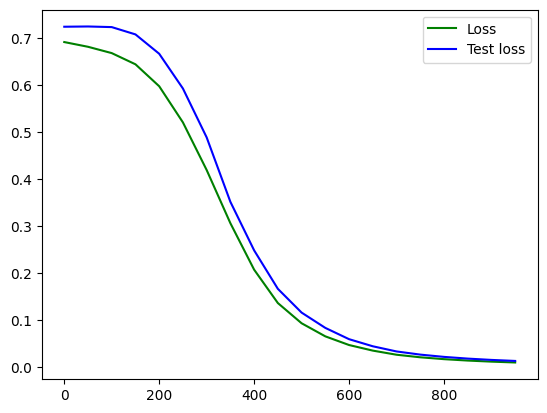

In [238]:
# Plot the loss over time

plt.figure()
plt.plot(epoch_list, loss_list, label="Loss", color="green")
plt.plot(epoch_list, test_loss_list, label="Test loss", color="blue")
plt.legend()

## Inference model

In [240]:
# Inference the model to see the prediction accuracy versus the true labels
with torch.inference_mode():
  label_predictions = torch.round(torch.sigmoid(model(X_test))).squeeze()
print(label_predictions)
print(y_test)
print(label_predictions == y_test)

tensor([0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0.,
        1., 1.], device='cuda:0')
tensor([0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0.,
        1., 1.], device='cuda:0')
tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True], device='cuda:0')
